# Score Prediction using Linear Regression

In [1]:
#Importing the relevant packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Dataset.
data = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/students_score.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Exploratory Data Analysis

In [3]:
#Iformation about the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Various Statistical Parameter Analysis
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


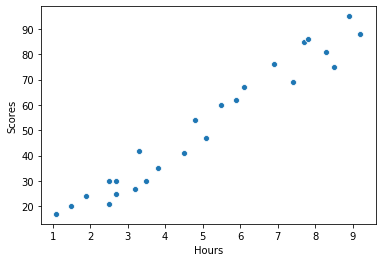

In [5]:
#Scatter Plot of the Data.
sns.scatterplot(data = data, x = "Hours", y = "Scores" )

The above plot depicts that there is a positive linear relation between the number of hours studied and the percentage of score obtained by a student. 

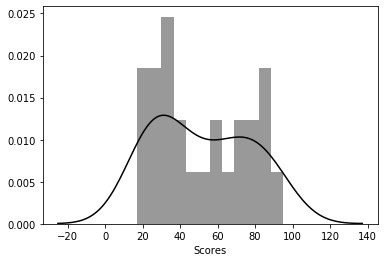

In [8]:
sns.distplot(data['Scores'], kde = True, color = "black", bins = 12)

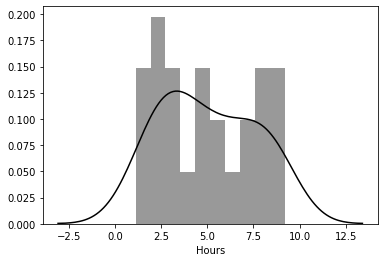

In [9]:
sns.distplot(data['Hours'], kde = True, color = "black", bins = 10)

Preparing the Data

In [10]:
#Importing the relevant packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
#Assigning the variables to X and y. 
X = np.array(data['Hours']).reshape(-1,1)   
y = np.array(data['Scores'])
#The input(X) and the output(y) variables are defined.Reshape is used on X because is it required to be 2D.

In [12]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [13]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Splitting the Data

In [45]:
#Splitting the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 0)

In [46]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(18, 1) (18,) (7, 1) (7,)


Here the data is split into two various groups of training data and testing data. 

Training the Model

In [47]:
#Applyin the Linear Regression model.
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
model.intercept_

1.932204253151646

In [50]:
model.coef_

array([9.94167834])

Predicting the Model

In [51]:
#Predicting the Model Values
y_predict = model.predict(X_test)

In [52]:
y_predict

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

Plotting the Values

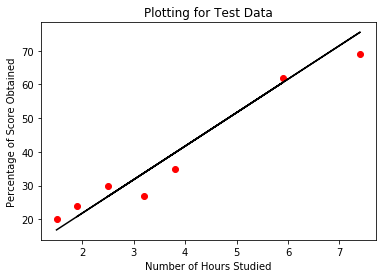

In [66]:
#Plotting the test data values
plt.scatter(X_test, y_test, color ='r') 
plt.plot(X_test, y_predict, color ='k') 
plt.xlabel("Number of Hours Studied")
plt.ylabel("Percentage of Score Obtained")
plt.title("Plotting for Test Data")
plt.show()


In [54]:
#Comparing the Actual vs Precdicted values.
Predicted_Values = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
Predicted_Values

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Predicting for the Problem Statement

In [55]:
#FWhat will be predicted score if a student study for 9.25 hrs in a day?
My_value = model.coef_*(9.25)+model.intercept_
My_value

array([93.89272889])

Measuring the Accuracy of the Model

In [56]:
#Checking the performance of the model.
from sklearn.metrics import mean_squared_error  #measures the model performance
from sklearn.metrics import mean_absolute_error #measures the difference between the true values and predicted values.

In [57]:
MSE = mean_squared_error(y_test, y_predict)

In [58]:
MSE

20.33292367497997

In [59]:
MAE = mean_absolute_error(y_test, y_predict)

In [60]:
MAE

4.130879918502486